# 第１章　基本的なクラスタリングを行う10本ノック

## ノック1:k-meansで非階層型クラスタリングを実施してみよう




In [12]:
##セル内複数項目表示
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

In [16]:
iris.data.shape

(150, 4)

In [17]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [18]:
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)

In [19]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


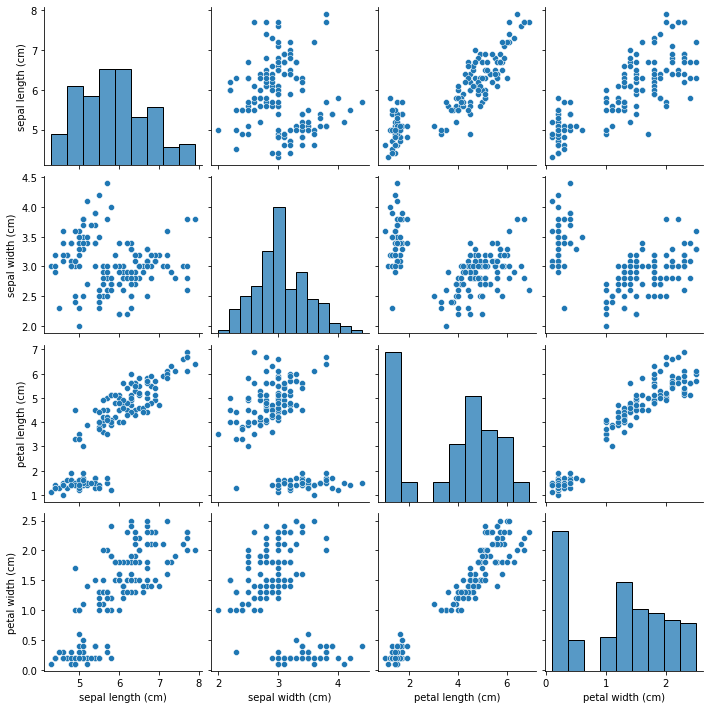

In [21]:
import seaborn as sns
df_temp = df_iris.copy()
sns.pairplot(df_temp)

In [22]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0, init="random")
cls_data = df_iris.copy()
model.fit(cls_data)

KMeans(init='random', n_clusters=3, random_state=0)

In [23]:
cluster = model.predict(cls_data)
print(cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


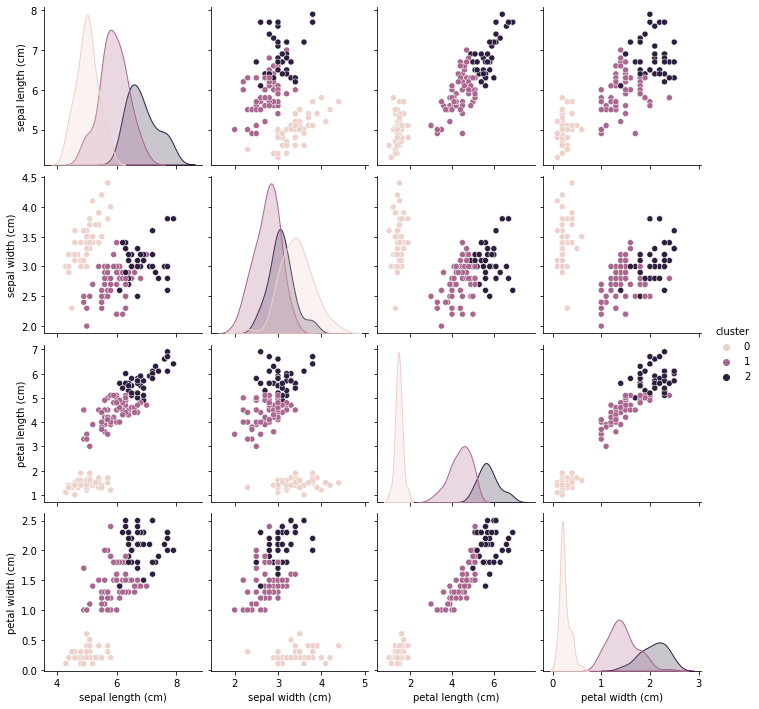

In [24]:
cls_data["cluster"] = cluster
sns.pairplot(cls_data, hue="cluster")

In [27]:
aa =model.cluster_centers_
aa.shape

(3, 4)

In [28]:
cls_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'cluster'],
      dtype='object')

In [29]:
cluster_center = pd.DataFrame(model.cluster_centers_)
cluster_center.columns = cls_data.columns[:4]
display(cluster_center)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


Text(0.5, 0, 'sepal length (cm)')

Text(0, 0.5, 'sepal width (cm)')

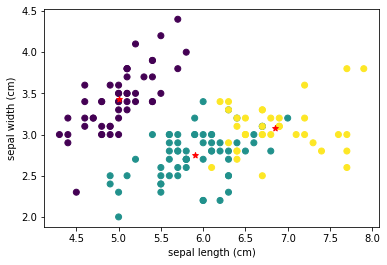

In [30]:
plt.scatter(cls_data["sepal length (cm)"], cls_data["sepal width (cm)"], c=cls_data["cluster"])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(cluster_center["sepal length (cm)"], cluster_center["sepal width (cm)"], marker="*", color="red")

In [56]:
display(cls_data.groupby("cluster").mean().round(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.01,3.43,1.46,0.25
1,5.90,2.75,4.39,1.43
2,6.85,3.07,5.74,2.07


In [57]:
temp = pd.DataFrame(iris.target)
temp.columns=["tarClu"]
aa= pd.concat([df_iris, temp], axis = 1)
display(aa.groupby("tarClu").mean().round(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
tarClu,,,,
0,5.01,3.43,1.46,0.25
1,5.94,2.77,4.26,1.33
2,6.59,2.97,5.55,2.03


In [58]:
cls_data["target"] = iris.target
cls_data.loc[cls_data["target"] == 0, "target"] = "setosa"
cls_data.loc[cls_data["target"] == 1, "target"] = "versicolor"
cls_data.loc[cls_data["target"] == 2, "target"] = "virginica"
display(cls_data.groupby("target").mean().round(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
target,,,,,
setosa,5.01,3.43,1.46,0.25,0.00
versicolor,5.94,2.77,4.26,1.33,1.04
virginica,6.59,2.97,5.55,2.03,1.72


## ノック2:クラスタリングの結果を評価してみよう

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
ari = "ARI: {:.2f}".format(adjusted_rand_score(iris.target, cls_data["cluster"]))
accuracy = "Accuracy: {:.2f}".format(accuracy_score(iris.target, cls_data["cluster"]))
print(ari)
print(accuracy)

ARI: 0.73
Accuracy: 0.89


## ノック3:k-means++で非階層型クラスタリングを実施してみよう




KMeans(n_clusters=3, random_state=0)

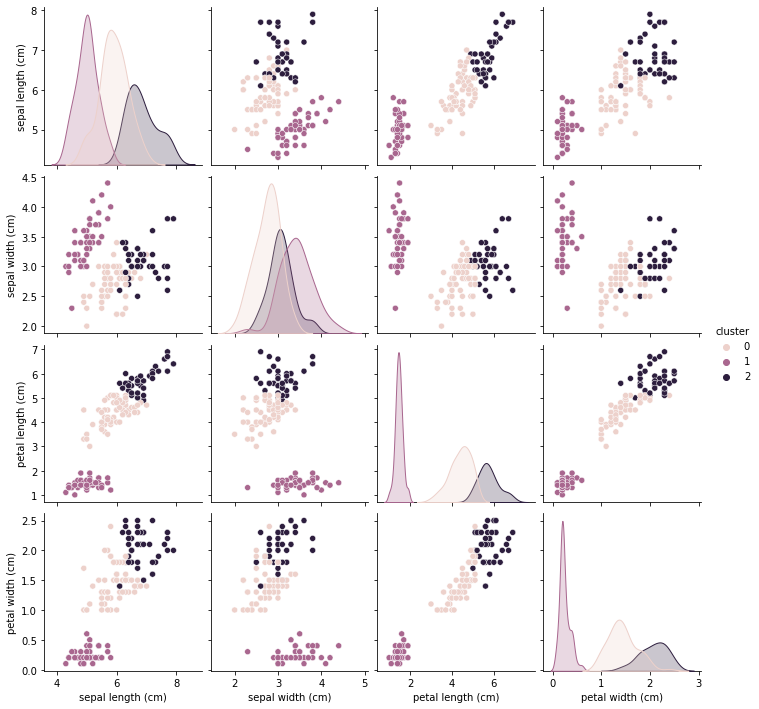

In [61]:
model = KMeans(n_clusters=3, random_state=0, init="k-means++")
cls_data = df_iris.copy()
model.fit(cls_data)
cluster = model.predict(cls_data)
cls_data["cluster"] = cluster
sns.pairplot(cls_data, hue="cluster")

In [63]:
ari = "ARI: {:.2f}".format(adjusted_rand_score(iris.target, cls_data["cluster"]))
accuracy = "Accuracy: {:.2f}".format(accuracy_score(iris.target, cls_data["cluster"]))
print(ari)
print(accuracy)

ARI: 0.73
Accuracy: 0.24


ARI: 0.54


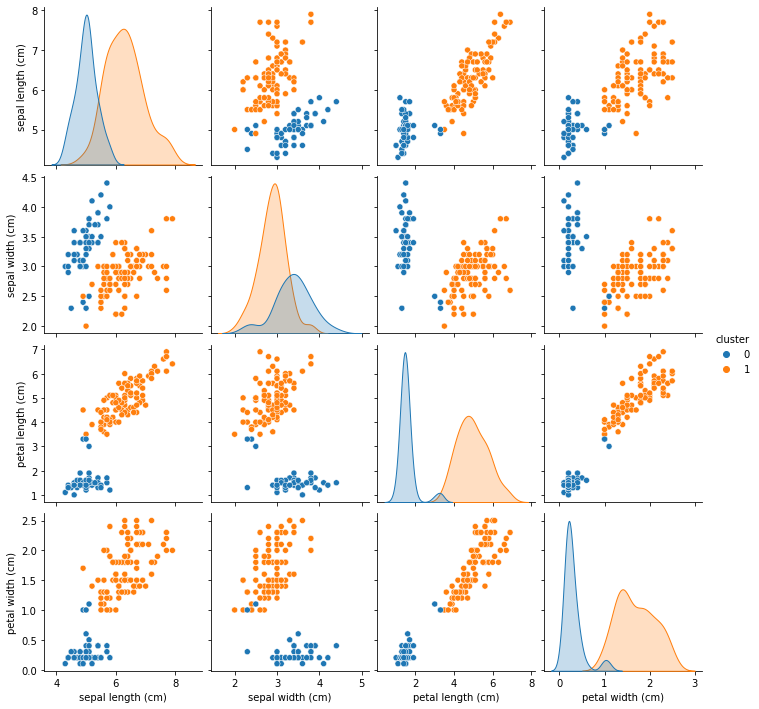

In [ ]:
model = KMeans(n_clusters=2, random_state=0)
cls_data = df_iris.copy()
cls_data["cluster"] = model.fit_predict(cls_data)
sns.pairplot(cls_data, hue="cluster")
print("ARI: {:.2f}".format(adjusted_rand_score(iris.target, cls_data["cluster"])))

## ノック4:エルボー法で最適なクラスター数を探索してみよう  




<function matplotlib.pyplot.show>

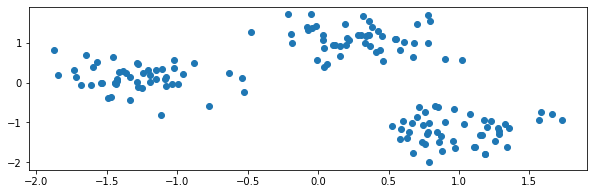

In [ ]:
from sklearn.datasets import make_blobs
from sklearn import cluster, preprocessing
X,y=make_blobs(n_samples=150,
               n_features=2, 
               centers=3,  
               cluster_std=0.5,
               shuffle=True,  
               random_state=0)
sc=preprocessing.StandardScaler()
X_norm=sc.fit_transform(X)
x=X_norm[:,0]
y=X_norm[:,1]
plt.figure(figsize=(10,3))
plt.scatter(x,y)
plt.show

In [ ]:
distortions = []
for i  in range(1,11): 
    km = KMeans(n_clusters=i,
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X_norm)
    distortions.append(km.inertia_)

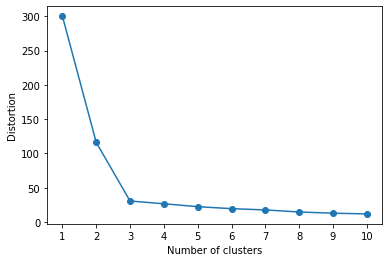

In [ ]:
plt.plot(range(1,11),distortions,marker="o")
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

<function matplotlib.pyplot.show>

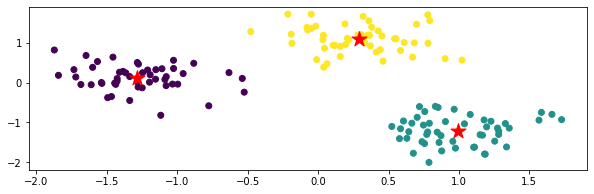

In [ ]:
km = KMeans(n_clusters=3,
                n_init=10,
                max_iter=300,
                random_state=0)
z_km=km.fit(X_norm)    
plt.figure(figsize=(10,3))
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker="*",c="red")
plt.show

## ノック5:シルエット分析で最適なクラスター数を探索してみよう




In [ ]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels=np.unique(z_km.labels_)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(X, z_km.labels_)

50
50
50


([<matplotlib.axis.YTick at 0x7f03081950d0>,
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3')])

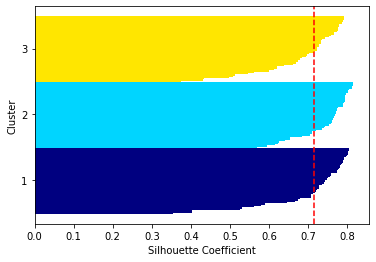

In [ ]:
y_ax_lower,y_ax_upper=0,0
yticks=[]

for i,c in enumerate(cluster_labels):
  c_silhouette_vals=silhouette_vals[z_km.labels_==c]
  print(len(c_silhouette_vals))
  c_silhouette_vals.sort()
  y_ax_upper +=len(c_silhouette_vals)
  color=cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower,y_ax_upper),
           c_silhouette_vals,
           height=1.0,
           edgecolor="none",
           color=color
          )
  yticks.append((y_ax_lower+y_ax_upper)/2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.ylabel("Cluster")
plt.xlabel("Silhouette Coefficient")
plt.yticks(yticks,cluster_labels + 1)    

<function matplotlib.pyplot.show>

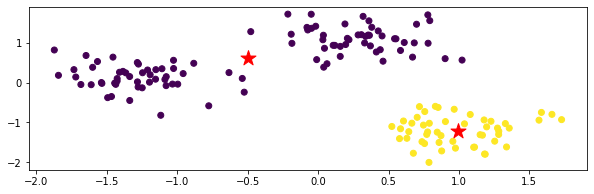

In [ ]:
km = KMeans(n_clusters=2,
                n_init=10,
                max_iter=300,
                random_state=0)
z_km=km.fit(X_norm)    

plt.figure(figsize=(10,3))
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker="*",c="red")
plt.show

100
50


([<matplotlib.axis.YTick at 0x7f0307f1e590>,
 [Text(0, 0, '1'), Text(0, 0, '2')])

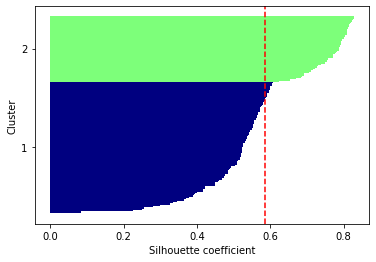

In [ ]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels=np.unique(z_km.labels_)
n_clusters=cluster_labels.shape[0]

silhouette_vals=silhouette_samples(X, z_km.labels_,metric="euclidean")

y_ax_lower,y_ax_upper=0,0
yticks=[]

for i,c in enumerate(cluster_labels):
  c_silhouette_vals=silhouette_vals[z_km.labels_==c]
  print(len(c_silhouette_vals))
  c_silhouette_vals.sort()
  y_ax_upper +=len(c_silhouette_vals)
  color=cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower,y_ax_upper),
           c_silhouette_vals,
           height=1.0,
           edgecolor="none",
           color=color
          )
  yticks.append((y_ax_lower+y_ax_upper)/2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.show
plt.yticks(yticks,cluster_labels + 1)    

## ノック6:階層型クラスタリングを実施してみよう

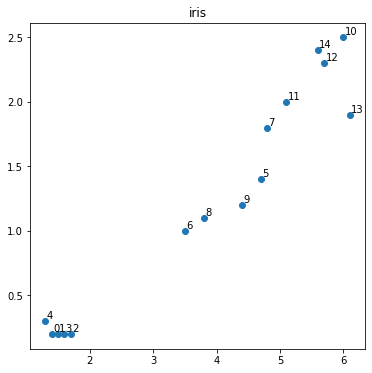

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
X = load_iris().data[::10, 2:4]
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, title="iris")
plt.scatter(X[:, 0], X[:, 1])
for i, element in enumerate(X):
    plt.text(element[0]+0.02, element[1]+0.02, i)
plt.show()

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import linkage
Z = linkage(X, method="ward", metric="euclidean")
pd.DataFrame(Z)

,0,1,2,3
0,2.0,3.0,0.100000,2.0
1,0.0,1.0,0.100000,2.0
2,12.0,14.0,0.141421,2.0
3,4.0,16.0,0.208167,3.0
4,6.0,8.0,0.316228,2.0
5,5.0,9.0,0.360555,2.0
6,7.0,11.0,0.360555,2.0
7,15.0,18.0,0.390726,5.0
8,10.0,17.0,0.439697,3.0
9,13.0,23.0,0.735980,4.0


## ノック7:樹形図(デンドログラム)を解釈してみよう

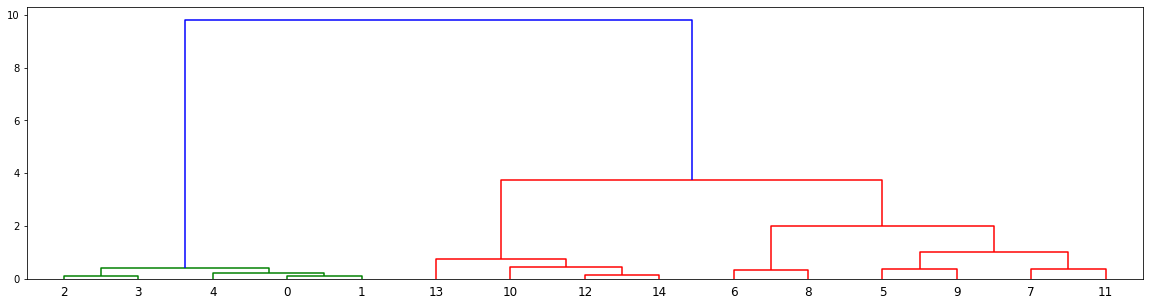

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
fig2, ax2 = plt.subplots(figsize=(20,5))
ax2 = dendrogram(Z)
fig2.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, t=3, criterion="maxclust")
for i, c in enumerate(clusters):
    print(i, c)

0 1
1 1
2 1
3 1
4 1
5 3
6 3
7 3
8 3
9 3
10 2
11 3
12 2
13 2
14 2


In [ ]:
clusters1 = fcluster(Z, 1.6, criterion="distance")
for i, c in enumerate(clusters1):
    print(i, c)

0 1
1 1
2 1
3 1
4 1
5 4
6 3
7 4
8 3
9 4
10 2
11 4
12 2
13 2
14 2


## ノック8:最短距離法で階層型クラスタリングを実施してみよう

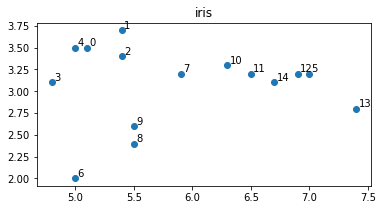

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
X = load_iris().data[::10]
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 1, 1, title="iris")
plt.scatter(X[:, 0], X[:, 1])
for i, element in enumerate(X):
    plt.text(element[0]+0.02, element[1]+0.02, i)
plt.show()

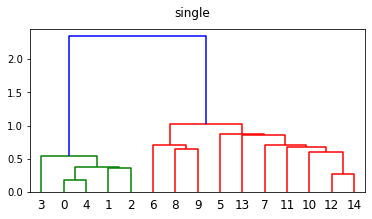

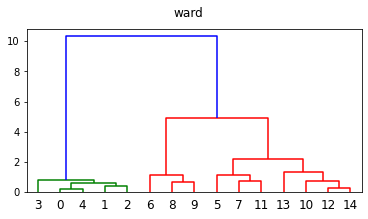

In [ ]:
Z = linkage(X, method="single", metric="euclidean")
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle("single")
fig2.show()

Z = linkage(X, method="ward", metric="euclidean")
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle("ward")
fig2.show()

## ノック9:最長距離法で階層型クラスタリングを実施してみよう

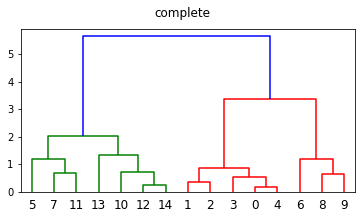

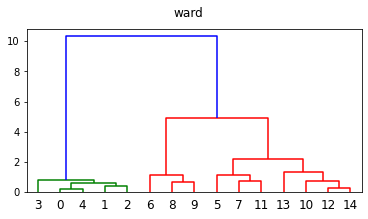

In [ ]:
Z = linkage(X, method="complete", metric="euclidean")
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle("complete")
fig2.show()

Z = linkage(X, method="ward", metric="euclidean")
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle("ward")
fig2.show()

## ノック10:群平均法で階層型クラスタリングを実施してみよう

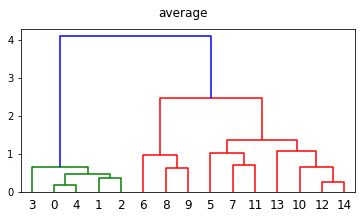

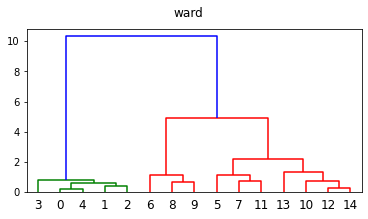

In [ ]:
Z = linkage(X, method="average", metric="euclidean")
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle("average")
fig2.show()

Z = linkage(X, method="ward", metric="euclidean")
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle("ward")
fig2.show()